#### Problem 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 1.81041489e+01,  2.91841412e+01],
       [ 3.36446118e+00, -7.90966845e+00],
       [-2.07167511e+01, -8.94725513e+00],
       [ 2.76545868e+01,  2.66364594e+01],
       [ 4.35941935e+00, -7.43922949e+00],
       [-1.18708668e+01, -3.19696522e+00],
       [-9.88421822e+00, -3.11915612e+00],
       [-2.67814331e+01, -1.50311155e+01],
       [ 2.85059834e+01,  2.74729290e+01],
       [ 2.97867966e+01,  2.44989853e+01],
       [-1.03291616e+01, -2.70374441e+00],
       [-6.06545353e+00, -9.15262985e+00],
       [-5.61790419e+00, -1.35841761e+01],
       [ 2.86210976e+01,  2.46200790e+01],
       [-7.11505461e+00, -1.45416355e+01],
       [ 7.49843025e+00, -8.60527611e+00],
       [ 1.22831607e+00, -5.80473423e+00],
       [-2.18536625e+01, -8.58939934e+00],
       [-1.68641014e+01, -1.03258257e+01],
       [-1.86876888e+01, -6.71250486e+00],
       [ 2.41089859e+01,  2.88961773e+01],
       [-7.64432192e-01, -5.37148428e+00],
       [-1.35651073e+01, -3.63450623e+00],
       [-8.

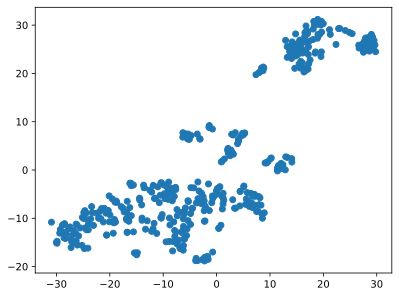

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

#### Problem 2

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
kmeans_train = kmeans.fit_predict(X_train_scaled)

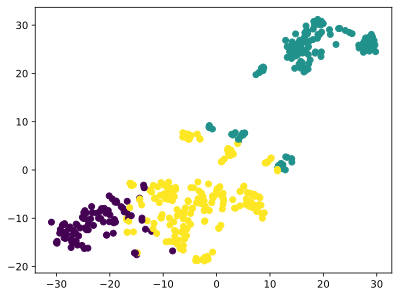

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=kmeans_train)
plt.show()

In [10]:
print(f'В первом кластере среднее значение price равно {(y_train[kmeans_train == 0].mean())},'
      f' среднее значение CRIM равно {X_train.loc[kmeans_train == 0, "CRIM"].mean()}')
print(f'Во втором кластере среднее значение price равно {(y_train[kmeans_train == 1].mean())},'
      f' среднее значение CRIM равно {X_train.loc[kmeans_train == 1, "CRIM"].mean()}')
print(f'В третьем кластере среднее значение price равно {(y_train[kmeans_train == 2].mean())},'
      f' среднее значение CRIM равно {X_train.loc[kmeans_train == 2, "CRIM"].mean()}')

В первом кластере среднее значение price равно 27.78837209302326, среднее значение CRIM равно 0.07356558139534884
Во втором кластере среднее значение price равно 16.165354330708663, среднее значение CRIM равно 10.797028425196851
В третьем кластере среднее значение price равно 24.958115183246072, среднее значение CRIM равно 0.4216602094240837


#### Problem 3

In [11]:
kmeans_test = kmeans.predict(X_test_scaled)
print('На тестовых данных')
print(f'в первом кластере среднее значение price равно {(y_test[kmeans_test == 0].mean())},'
      f' среднее значение CRIM равно {X_test.loc[kmeans_test == 0, "CRIM"].mean()}')
print(f'во втором кластере среднее значение price равно {(y_test[kmeans_test == 1].mean())},'
      f' среднее значение CRIM равно {X_test.loc[kmeans_test == 1, "CRIM"].mean()}')
print(f'в третьем кластере среднее значение price равно {(y_test[kmeans_test == 2].mean())},'
      f' среднее значение CRIM равно {X_test.loc[kmeans_test == 2, "CRIM"].mean()}')

На тестовых данных
в первом кластере среднее значение price равно 31.35, среднее значение CRIM равно 0.06206
во втором кластере среднее значение price равно 16.43714285714286, среднее значение CRIM равно 10.165531142857143
в третьем кластере среднее значение price равно 21.860784313725492, среднее значение CRIM равно 0.2660788235294118
